<a href="https://colab.research.google.com/github/arthur-siqueira/projeto-inteligencia-artificial/blob/main/projeto_ia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIAS E TECNOLOGIA DA PARAÍBA – IFPB
# CAMPUS DE CAMPINA GRANDE
# CURSO ENGENHARIA DE COMPUTAÇÃO
# DISCIPLINA:Inteligencia Artificial.
# Projeto Semestral
# Professor: Marcelo José Siqueira Coutinho de Almeida
## Alunos:Nivaldo Pereira da Silva Neto, Arthur Henrique Siqueira Pantaleão,Lucas Daris de Souza

In [ ]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

In [ ]:
# Carregar o dataset
url = "https://raw.githubusercontent.com/Nivaldo-Neto-IF/heart/refs/heads/main/heart%20-%20heart.csv"
df = pd.read_csv(url)

# Fase 1: Pre-Processamento e Ánalise Inicial

### 1.1: Analise de valores e seus tipos de variavel

.

In [ ]:
# Exibindo as informações gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Exibindo as primeiras linhas
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


.
.




### 1.2 Verificação e tratamento de Valores vazios ou ausentes, e Analise Descritiva

.

In [ ]:
# Verificando valores ausentes ou duplicados
print("\nValores ausentes nas colunas\n")
display(df.isnull().sum())
print("\n Valores duplicados\n")
ldp = df[df.duplicated(keep=False)]
display(ldp)
df.drop_duplicates(inplace=True)


Valores ausentes nas colunas



,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0



 Valores duplicados



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
# Análise descritiva
display(df.describe())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


.

# Fase 2
## Analise de Dados e Graficos

.

## Função para geração de graficos

In [ ]:
# Geração de graficos para analise
def graficodf(df, coluna,nomegrafico):
        sns.set(style="whitegrid")
        df[coluna] = df[coluna].round(0).astype(int)
        ordem = sorted(df[coluna].unique())
        plt.figure(figsize=(12, 8))
        plt.title(f'variável {nomegrafico}', fontsize=16)
        aredond = sns.countplot(data=df, x=coluna, order=ordem)
        plt.xlabel(coluna, fontsize=14)
        plt.ylabel('Contagem', fontsize=14)
        plt.xticks(rotation=45)
        aredond.yaxis.set_major_locator(MaxNLocator(integer=True))
        sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")
        plt.show()

.

## Variavel Idade
### Utiliza como Base A idade em Anos

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


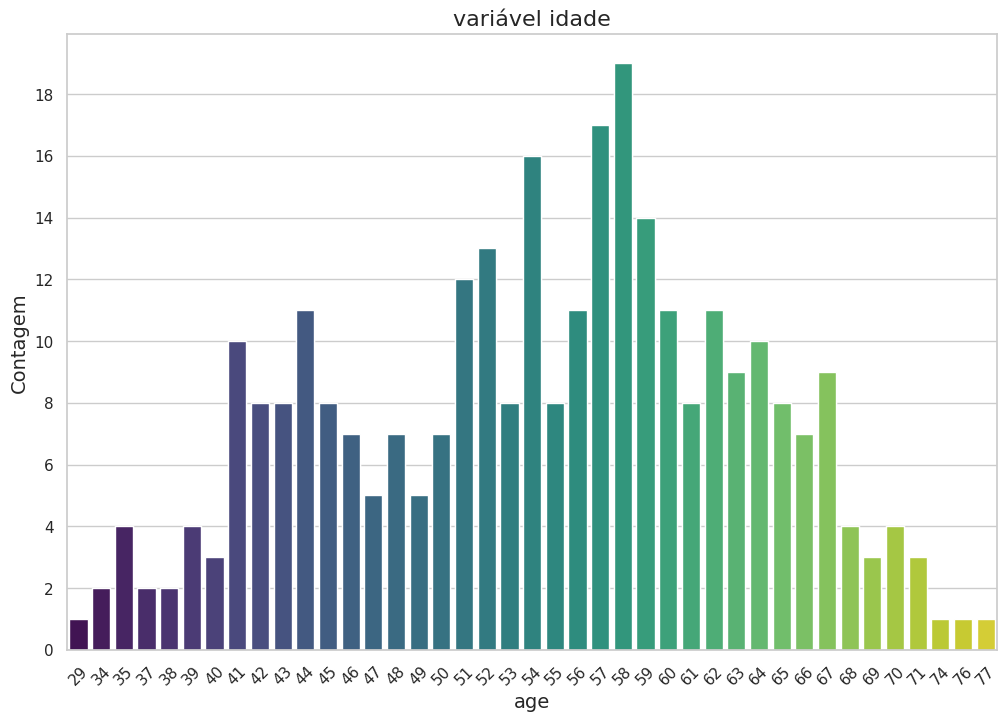

In [ ]:
graficodf(df,'age','idade')

.



## Variavel Sexo
### Utiliza como Base valores de 0 e 1
### 0 para masculino e 1 para Feminino



.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


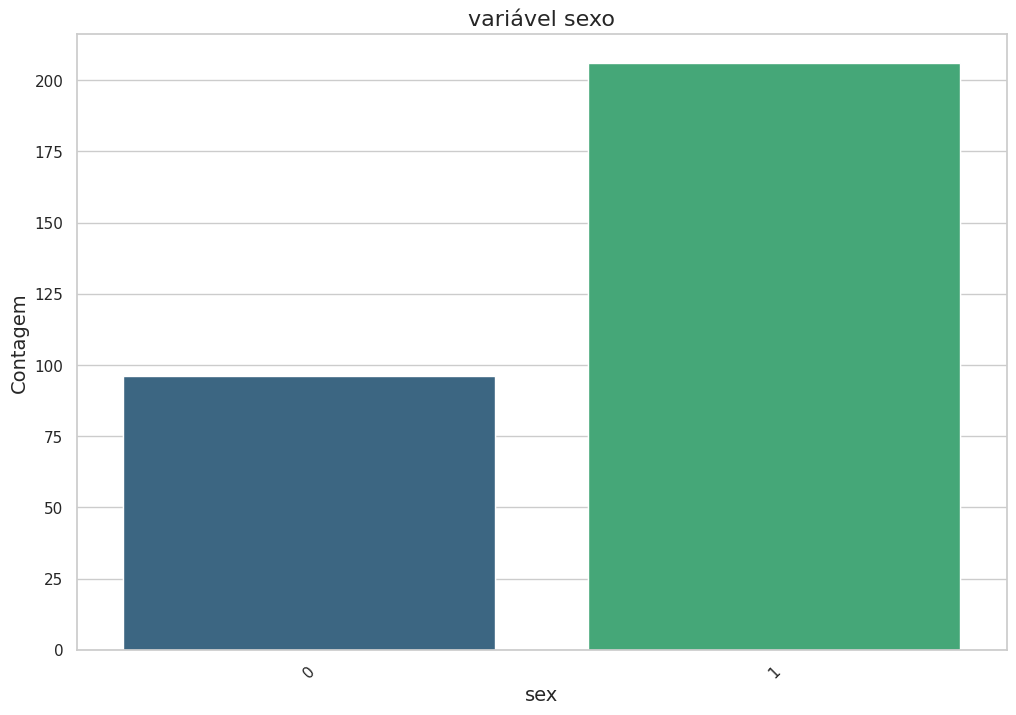

In [ ]:
graficodf(df,'sex','sexo')

.

## Variavel CP (Chest Pain(Dores no Peito/Torax))
### Utiliza como Base valores de 0 a 4
### 0: Angina Tipica
### 1: Angina Atipica
### 2: Dor não anginosa
### 3: Asintomatico


.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


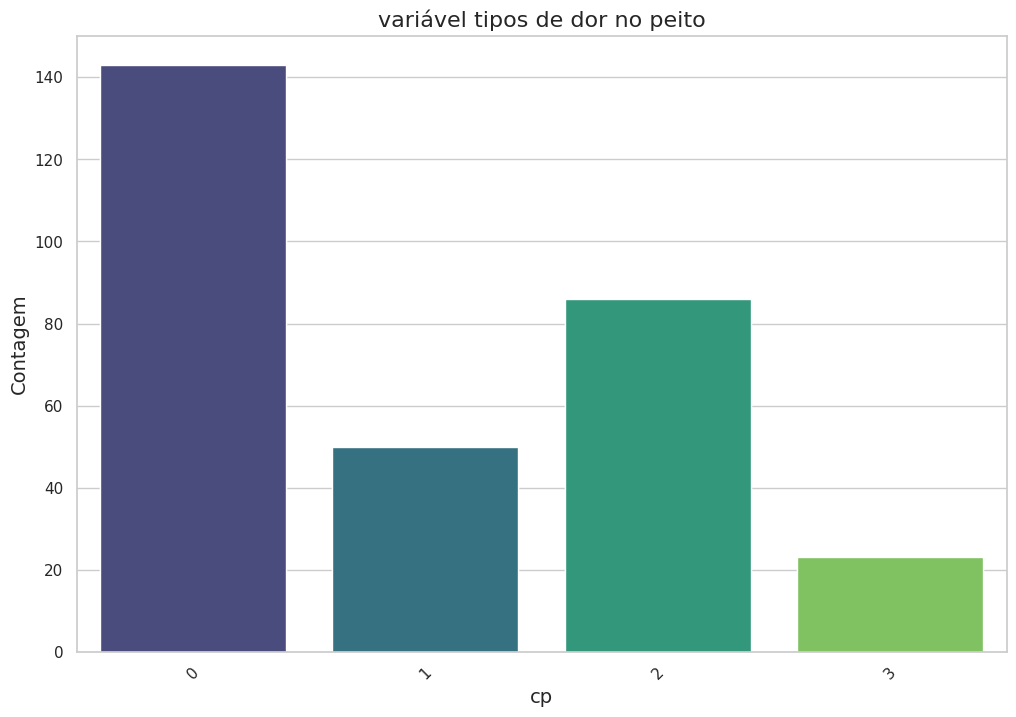

In [ ]:
graficodf(df,'cp','tipos de dor no peito')

.

## Variavel Presão Arterial
### Utiliza como Base Valores da Pressão arterial em repouso em mmHg

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


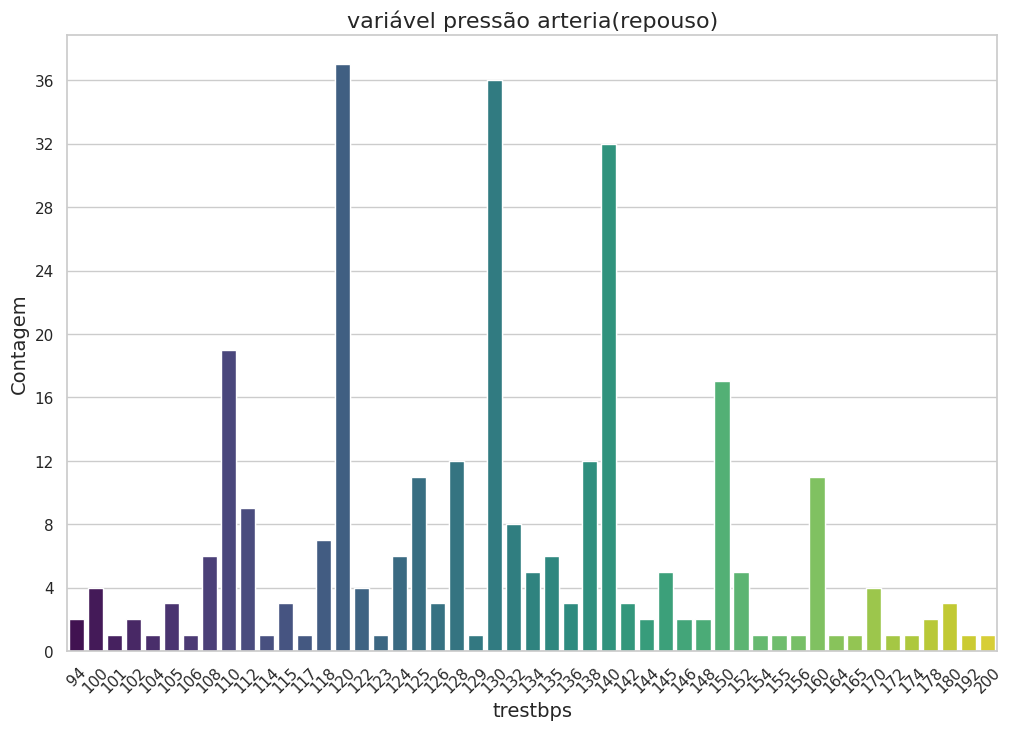

In [ ]:
graficodf(df,'trestbps','pressão arteria(repouso)')

.

## Variavel Colesterol
### Utiliza como Base Valores do Colesterol sérico em mg/dl

.

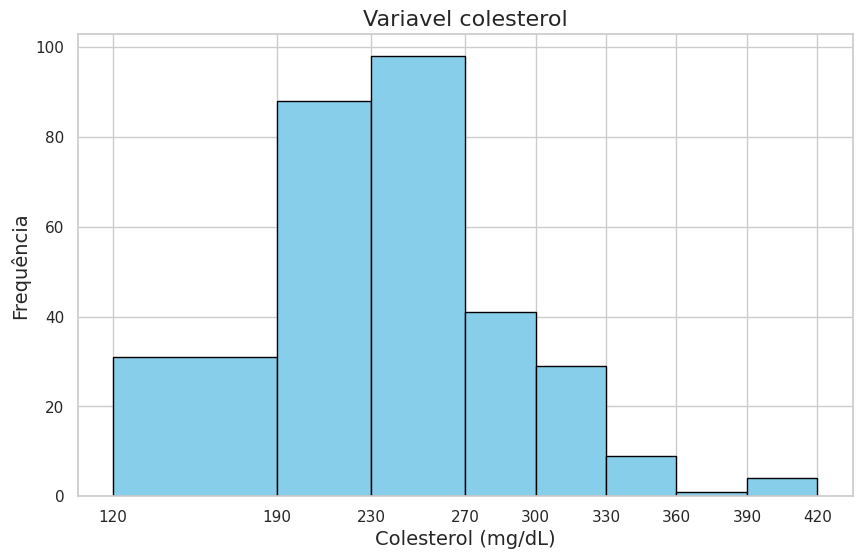

In [ ]:

df['chol'] = pd.to_numeric(df['chol'], errors='coerce')

bins = [120, 190, 230, 270,300,330,360,390,420]

plt.figure(figsize=(10, 6))
plt.hist(df['chol'], bins=bins, color='skyblue', edgecolor='black')
plt.title("Variavel colesterol", fontsize=16)
plt.xlabel("Colesterol (mg/dL)", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.xticks(bins)
plt.show()

.

## Variavel FBS(Fasting blood sugar level)
### Utiliza como Base o nível de açúcar no sangue em jejum
### 1 = O valor e acima de 120 mg/dl
### 0 = O valor e Abaixo de 120 mg/dl

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


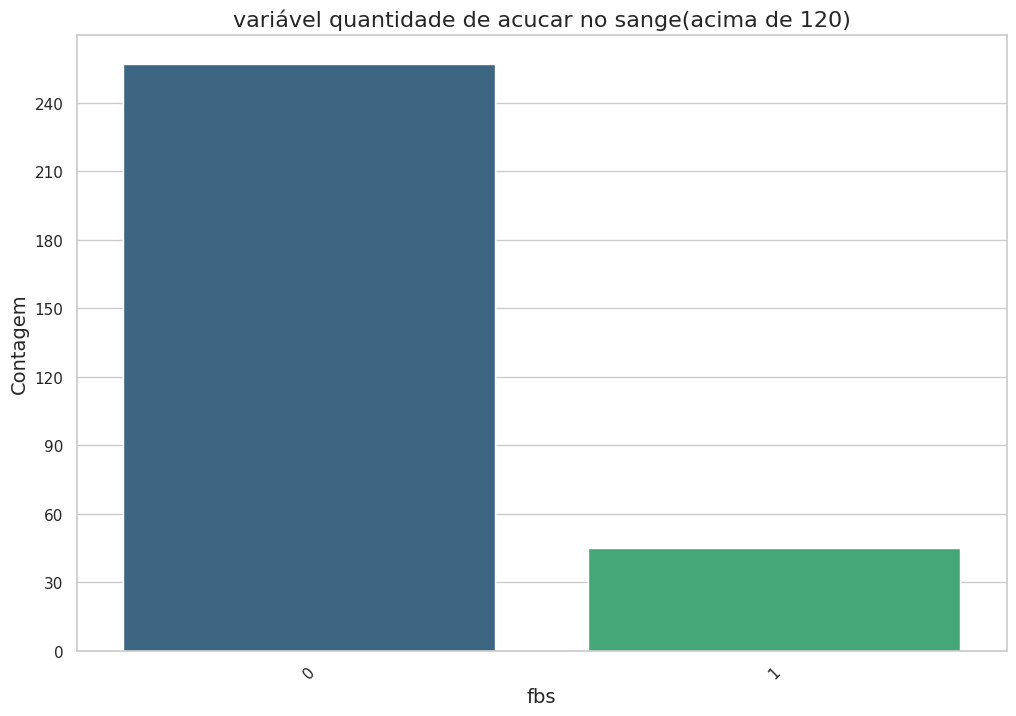

In [ ]:
graficodf(df,'fbs','quantidade de acucar no sange(acima de 120)')


.

## Variavel eletrocardiográficos de repouso:
### 0: Normal
### 1: Com anormalidade da onda ST-T
### 2: Mostrando provável ou definitiva hipertrofia ventricular esquerda

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


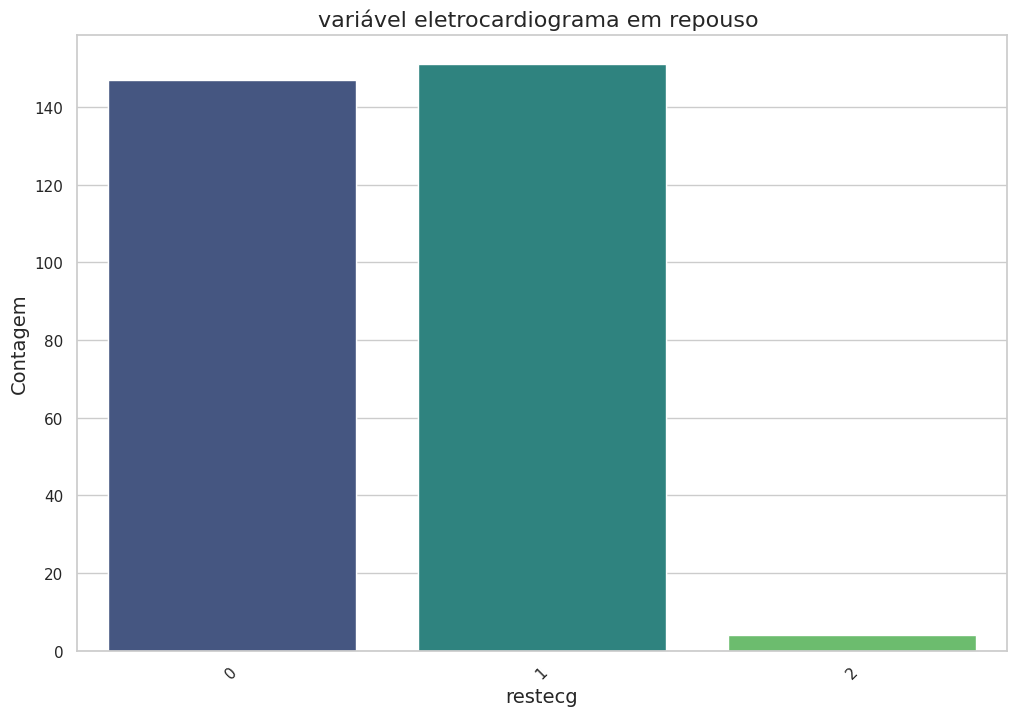

In [ ]:
graficodf(df,'restecg','eletrocardiograma em repouso ')

.

## Variavel Frequência cardíaca máxima alcançada durante um teste de estresse

.

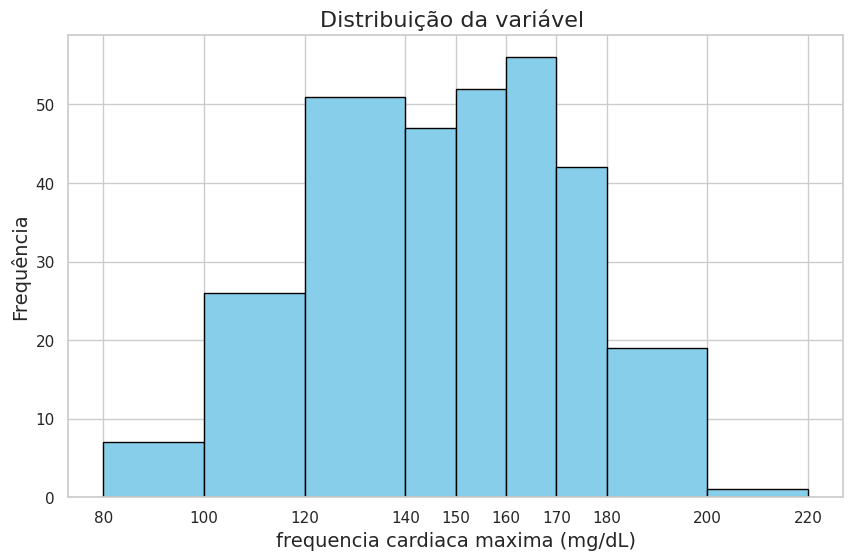

In [ ]:
df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')

bins = [80,100,120,140,150,160,170, 180, 200,220]

plt.figure(figsize=(10, 6))
plt.hist(df['thalach'], bins=bins, color='skyblue', edgecolor='black')
plt.title("Distribuição da variável ", fontsize=16)
plt.xlabel("frequencia cardiaca maxima (mg/dL)", fontsize=14)
plt.ylabel("Frequência", fontsize=14)
plt.xticks(bins)
plt.show()

..


## Angina induzida por exercício (1 = sim, 0 = não)
### 1 = sim
### 0 = não

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


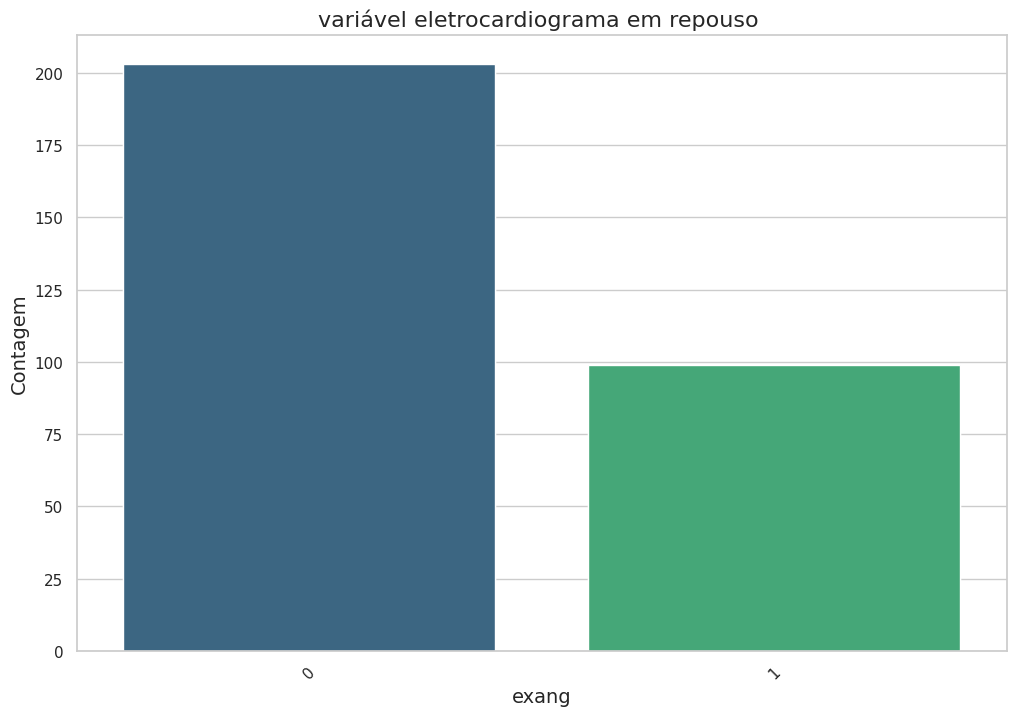

In [ ]:
graficodf(df,'exang','eletrocardiograma em repouso ')

.

## Depressão do segmento ST induzida pelo exercício em relação ao repouso

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


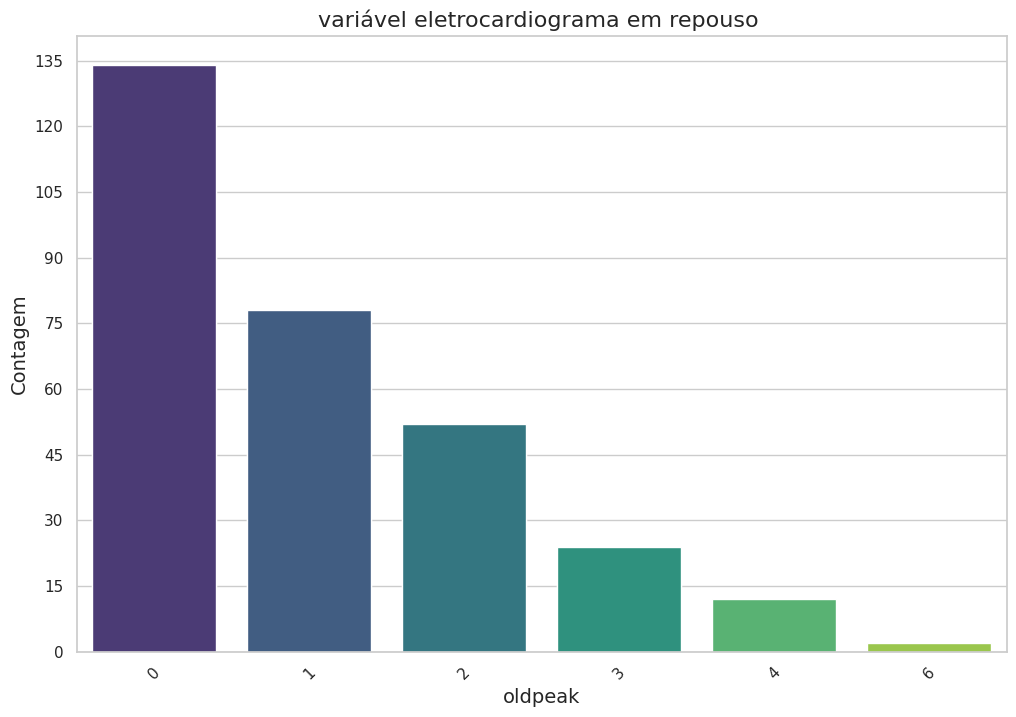

In [ ]:
graficodf(df,'oldpeak','eletrocardiograma em repouso ')

.

## Variavel Inclinação do segmento ST de pico do exercício
### 0: Ascendente
### 1: Plano
### 2: Descendente

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


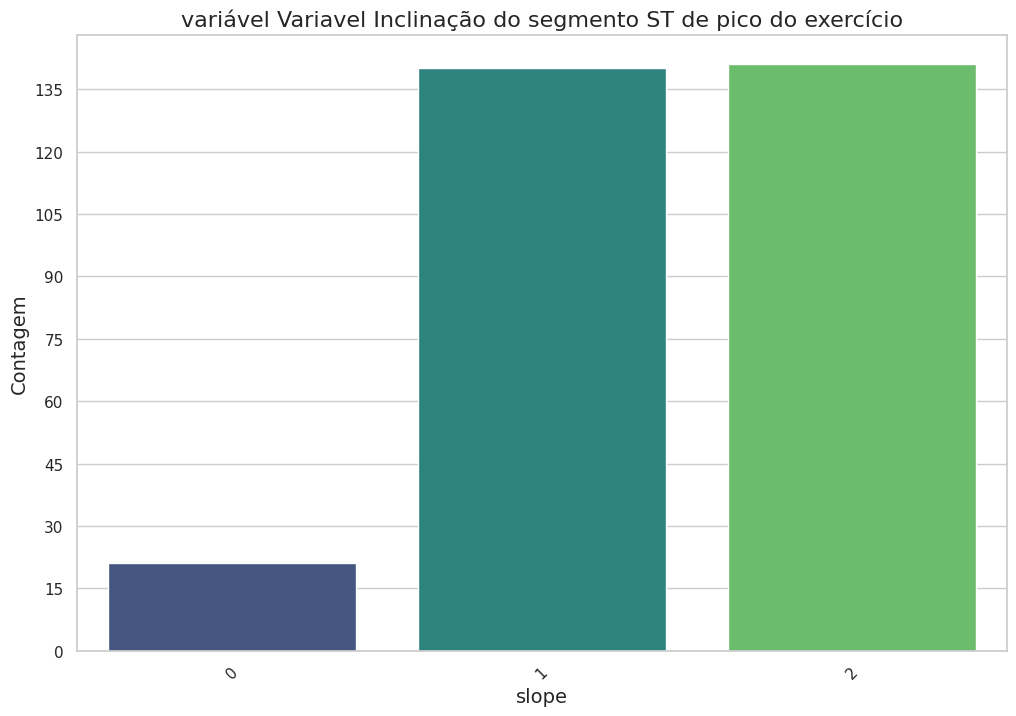

In [ ]:
graficodf(df,'slope','Variavel Inclinação do segmento ST de pico do exercício')

.



## Número de vasos principais coloridos por fluoroscopia
### Quantidade de 0 a 4

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


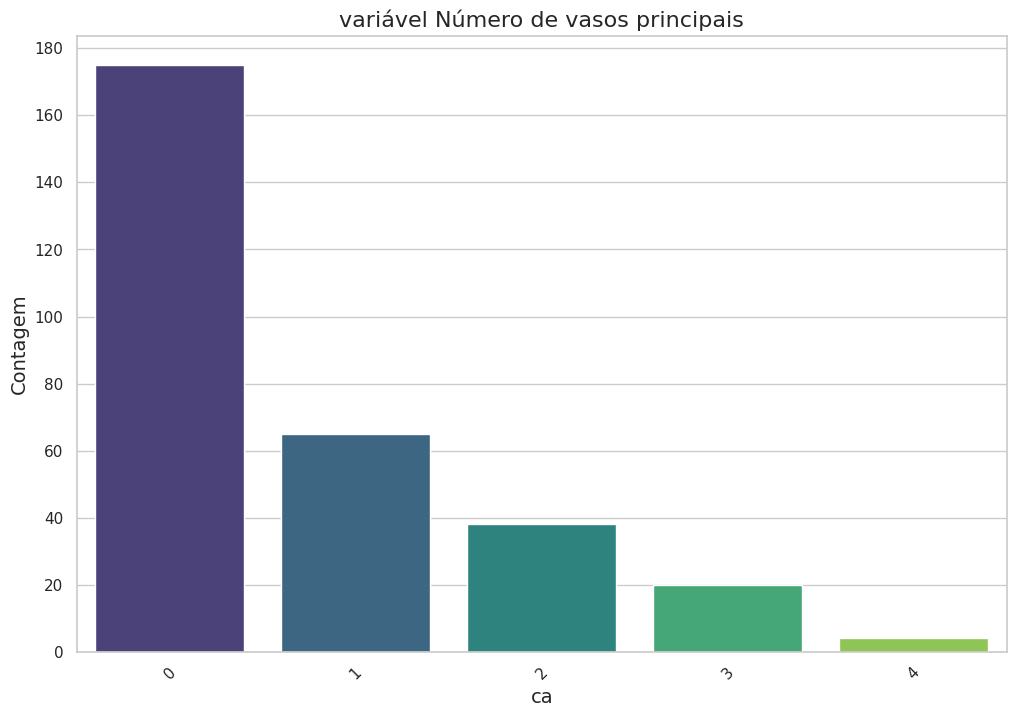

In [ ]:
graficodf(df,'ca','Número de vasos principais')

.

## Resultado do teste de estresse com tálio
###0: Normal
###1: Defeito corrigido
###2: Defeito reversível
###3: Não descrito

.

<ipython-input-8-5cb00745be75>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=coluna, order=ordem, palette="viridis")


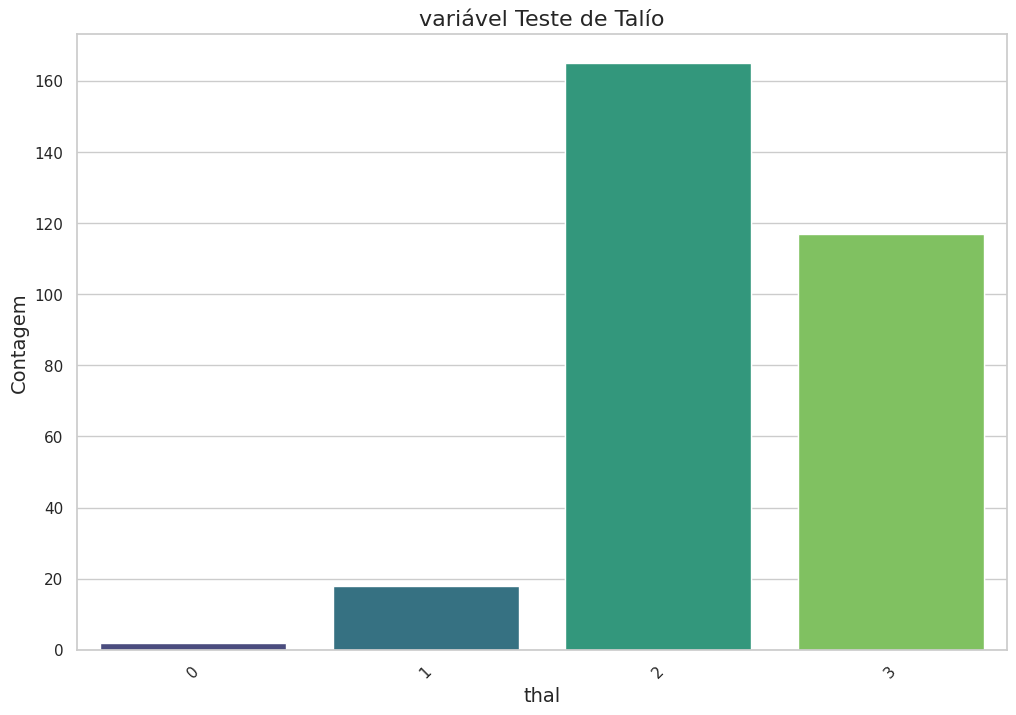

In [ ]:
graficodf(df,'thal','Teste de Talío')

.


## Estado da doença cardíaca

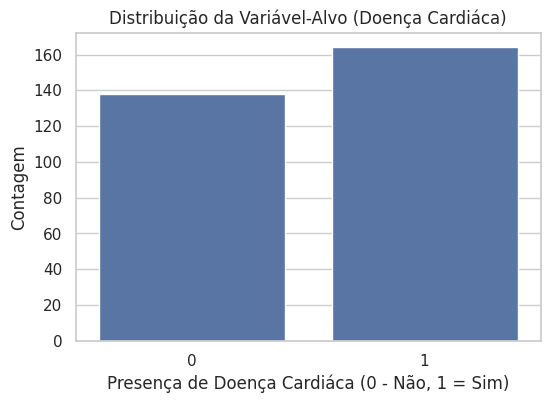

In [ ]:
# Distribuição da variável-alvo
plt.figure(figsize = (6,4))
sns.countplot(x=df['target'])
plt.title('Distribuição da Variável-Alvo (Doença Cardiáca)')
plt.xlabel('Presença de Doença Cardiáca (0 - Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Aplicação de One-Hot Encoding em variáveis categóricas
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,1,False,False,True,False,False,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,1,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,172,0,1.4,0,1,True,False,False,False,False,False,True,False,True,False
3,56,1,120,236,0,178,0,0.8,0,1,True,False,False,True,False,False,True,False,True,False
4,57,0,120,354,0,163,1,0.6,0,1,False,False,False,True,False,False,True,False,True,False


In [ ]:
# Separando variáveis preditoras e alvo
X = df_encoded.drop(columns=['target'])
y = df_encoded['target']

In [ ]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42, stratify=y)

In [ ]:
# Normalizando dados numéricos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Modelos para comparação
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
}

In [ ]:
# Avaliação dos Modelos
results = {}
for name, model in models.items():
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  results[name] = accuracy
  print(f'\n{name} - Acurácia: {accuracy:.4f}')
  print(classification_report(y_test, y_pred))
  print('Matriz de Confusão:')
  print(confusion_matrix(y_test, y_pred))


Logistic Regression - Acurácia: 0.8197
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

Matriz de Confusão:
[[21  7]
 [ 4 29]]

Random Forest - Acurácia: 0.7541
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61

Matriz de Confusão:
[[19  9]
 [ 6 27]]

SVM - Acurácia: 0.7869
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    ac

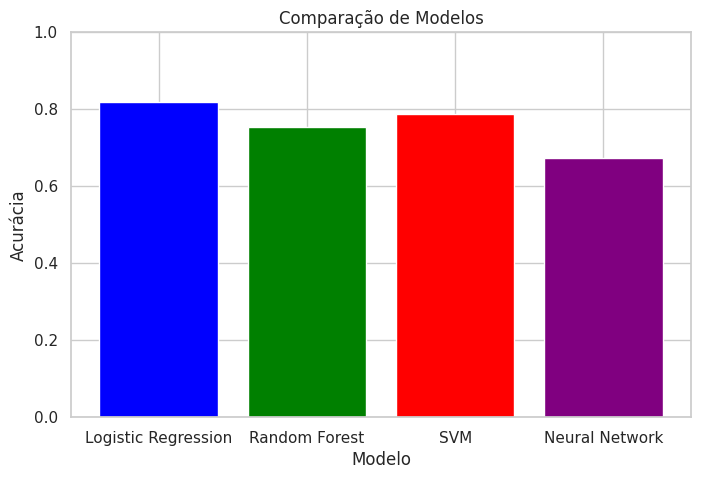

In [ ]:
# Comparação Gráfica das Acurácias
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Comparação de Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.ylim(0, 1)
plt.show()